In [ ]:
# Carregamento da img

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import cv2 #lib openCV

In [7]:
# conec ao google drive for access all file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from os import read
# add variavel img
imagem = cv2.imread('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/people1.jpg')

In [9]:
# see format img
imagem.shape # altura,largura e canais, img color have 3 canais (1280, 1920, 3)

(1280, 1920, 3)

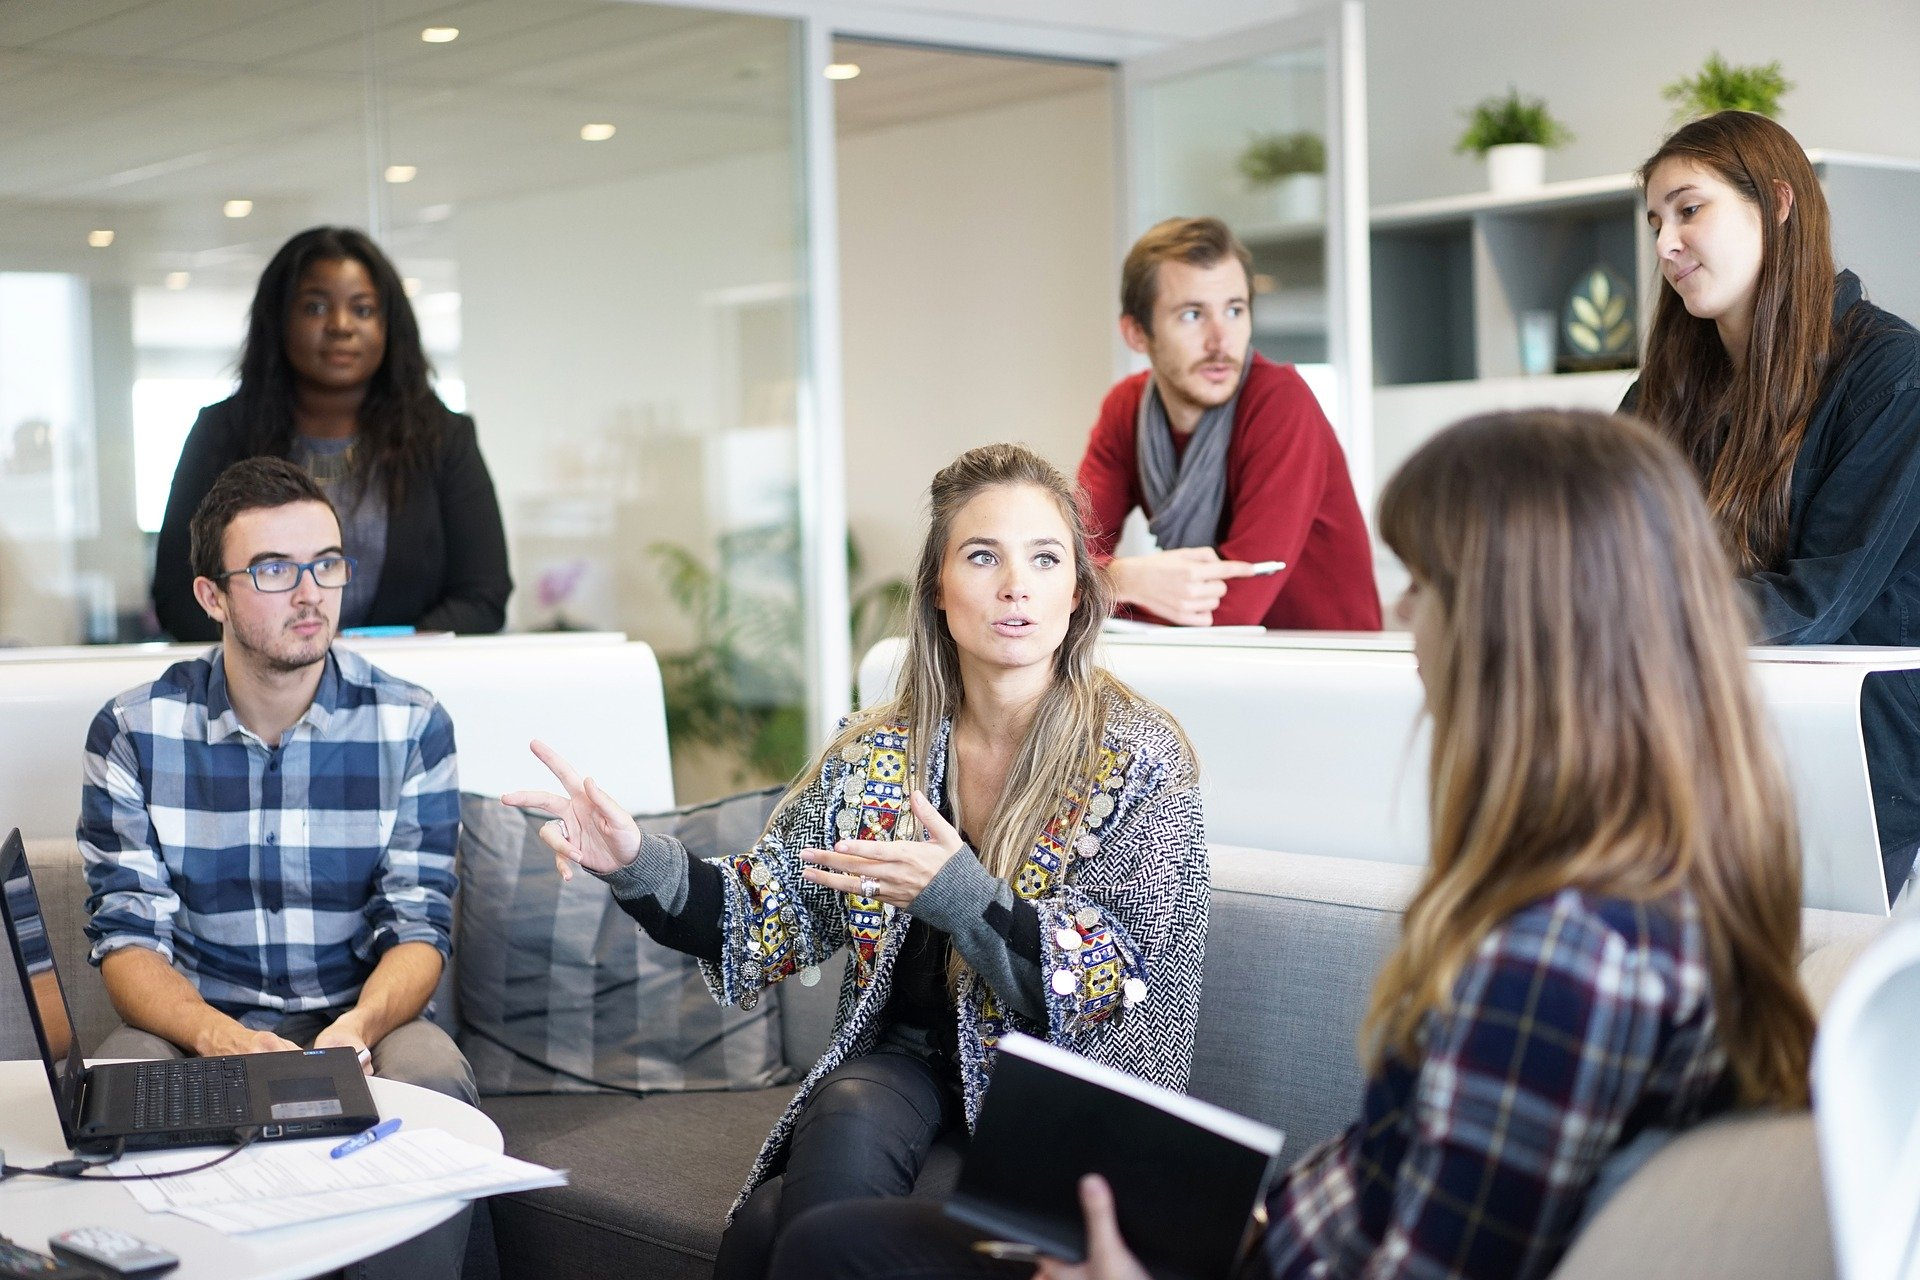

In [10]:
# visualizar a img
# cv2.imshow(imagem) #This line is causing the issue. It is disabled in Colab
from google.colab.patches import cv2_imshow
cv2_imshow(imagem) # Use cv2_imshow instead of cv2.imshow to display images in Colab


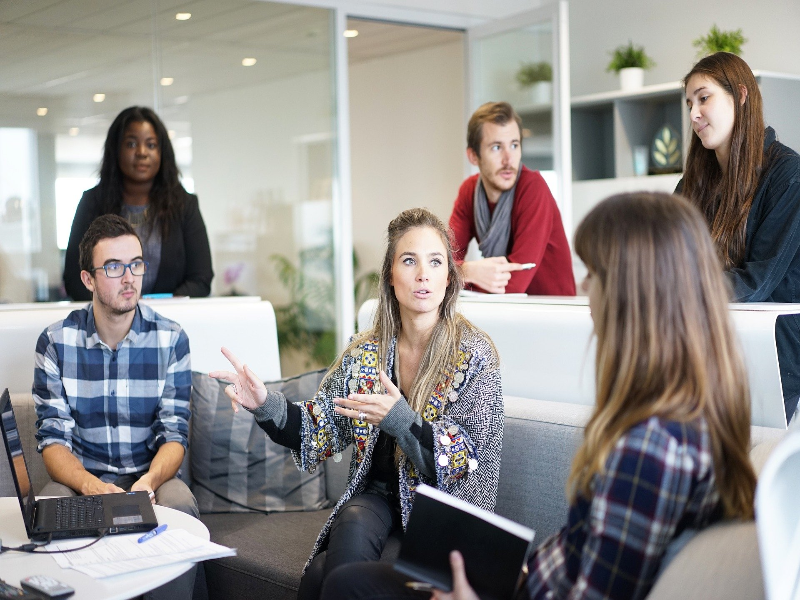

In [11]:
# diminuir a img
imagem = cv2.resize(imagem,(800,600))
imagem.shape # para ver a img
(600, 800, 3)
cv2_imshow(imagem)


In [12]:
 600 * 800 * 3 # ver quantidade de pixels, altura, largura e RGB, tem de pixels 1440000

1440000

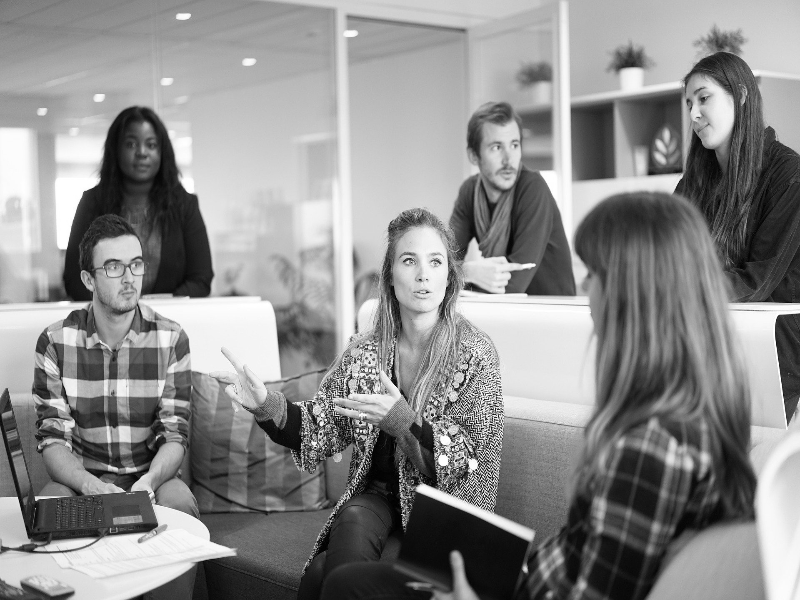

In [13]:
# converter em escala de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem_cinza)

In [14]:
imagem_cinza.shape # altura, largura (600 x 800 = nao tem cor x3)

(600, 800)

**Deteccao de Face**

In [15]:
detector_facial = cv2.CascadeClassifier('/content/drive/MyDrive/Visão Computacional Guia Completo/Cascades/haarcascade_frontalface_default.xml')
# da start para criar a variavel

In [16]:
# aplicar essa variavel na imagem, e chamar usando um metoth detecMultiScale que detecta faces
deteccoes = detector_facial.detectMultiScale(imagem_cinza)

In [17]:
# visualizar as deteccoes, o algoritmo encontrou 6 faces nessa img
# posicao X e Y => 115, 124 em pixels, esses valores 53,  53 eh o tamanho da face altura por largura
deteccoes

array([[677,  72,  68,  68],
       [115, 124,  53,  53],
       [475, 123,  59,  59],
       [387, 233,  73,  73],
       [ 92, 239,  66,  66],
       [390, 323,  56,  56]], dtype=int32)

In [18]:
# ver o tamanho, igual a 6 faces na img
len(deteccoes)

6

In [19]:
for (x, y, w, h) in deteccoes:
  print(x, y, w, h)

677 72 68 68
115 124 53 53
475 123 59 59
387 233 73 73
92 239 66 66
390 323 56 56


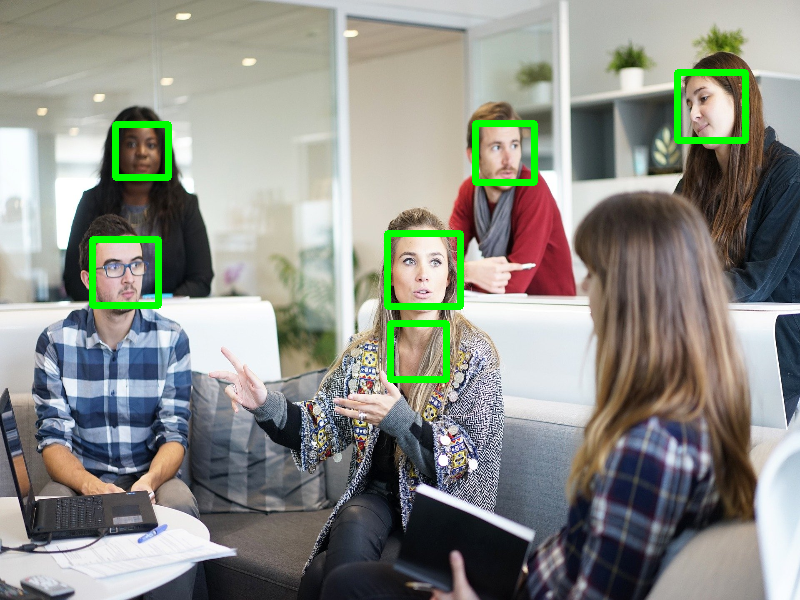

In [20]:
# percorrer os valores x,y,w,h e desenhar na img
for (x, y, w, h) in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 5) # desenhando o retangulo nas imagens
cv2_imshow(imagem)

# site para escolher as cores RGB (https://www.w3schools.com/colors/colors_rgb.asp)


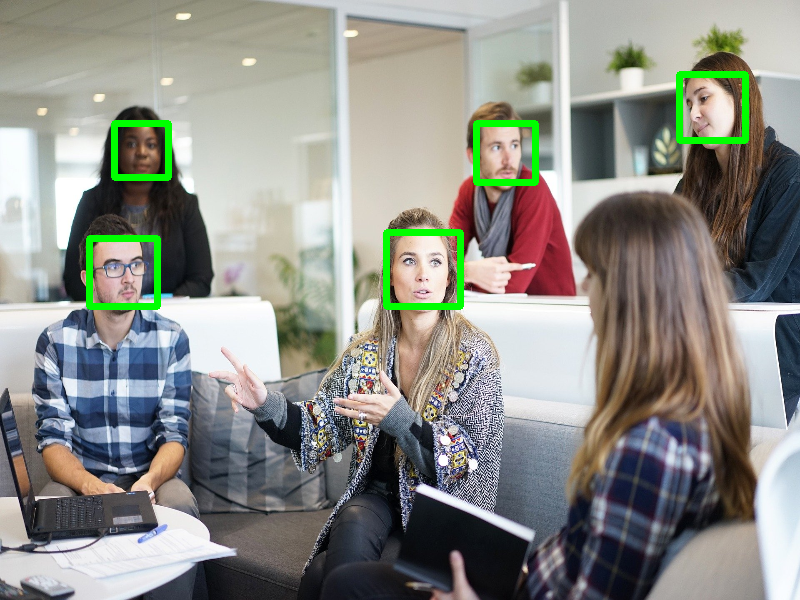

In [22]:
# melhorar falso positivo com o parametro haarcascate 1
imagem = cv2.imread('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/people1.jpg')
imagem = cv2.resize(imagem,(800,600))
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
deteccoes = detector_facial.detectMultiScale(imagem_cinza, scaleFactor=1.08) # escala da img scaleFactor=1.1,qto mais aumentar mais o algoritmo tera dificuldade de captar a imgs, o algoritmo nao consg fazer a deteccao
# faca testes de acordo com o tamanho da sua img, das inf que precise
for (x, y, w, h) in deteccoes:
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 5)
cv2_imshow(imagem)
